In [2]:
import pandas as pd

In [37]:
data = pd.read_csv('TSLA.csv', header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')
print(data)

                 Close
Date                  
2014-01-14   32.254002
2014-01-15   32.826000
2014-01-16   34.194000
2014-01-17   34.001999
2014-01-21   35.335999
...                ...
2020-11-09  421.260010
2020-11-10  410.359985
2020-11-11  417.130005
2020-11-12  411.760010
2020-11-13  408.500000

[1723 rows x 1 columns]


In [38]:
import matplotlib.pyplot as plt

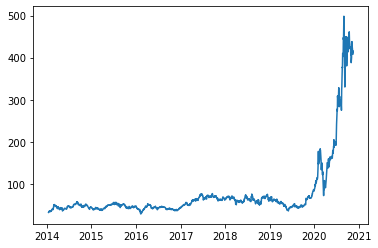

In [39]:
plt.plot(data['Close'])
plt.show()

In [59]:
len(data['Close'])

1723

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.00749597]
 [0.00871406]
 [0.01162727]
 ...
 [0.82710302]
 [0.81566743]
 [0.80872512]]


In [42]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

In [43]:
import numpy as np

In [44]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - timestep - 1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
    return np.array(data_x), np.array(data_y)

In [45]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x)

[[0.00749597]
 [0.00871406]
 [0.01162727]
 ...
 [0.04954577]
 [0.04995038]
 [0.06408624]]


In [46]:
print(train_x.shape)

(1204, 1)


In [47]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x)

[[[0.00749597]]

 [[0.00871406]]

 [[0.01162727]]

 ...

 [[0.04954577]]

 [[0.04995038]]

 [[0.06408624]]]


In [63]:
len(test_x)

515

In [48]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [49]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

1204/1204 [==============================] - 2s 2ms/step - loss: 0.0102 - accuracy: 8.3056e-04
Keras model loss =  0.000595724384766072
Keras model accuracy =  0.000830564764328301


In [51]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

print(train_predictions)

[[0.04796395]
 [0.04787573]
 [0.04766533]
 ...
 [0.0450035 ]
 [0.04497588]
 [0.04401949]]


In [52]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)

[[51.2572  ]
 [51.215775]
 [51.11697 ]
 ...
 [49.867016]
 [49.854042]
 [49.404938]]


In [58]:
len(test_predictions)

515

In [60]:
len(train_predictions)

1204

In [53]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions

In [54]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2+1:len(scaled_data)-1, :] = test_predictions

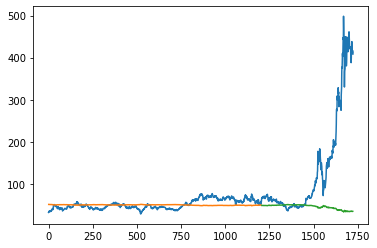

In [55]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()